# Smoothing particles

In [1]:
# Libraries ----
import sys  # type: ignore
import imageio  # type: ignore
import warnings
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append('../modules')
import track_particles as tp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_clustering as plt_cp  # type: ignore
import smoothing_particles as sp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

n_particles = 3
ordering = True
video_name = "3n_0m_3f_230404_1"
save_figures = True
x_bounds = [0, 1080]
y_bounds = [70, 1870]
x_zoom = [0, 1080]
y_zoom = [0, 1920]

## Load tracked data

In [3]:
df_tracked = pd.read_csv("{}/clustered_{}.csv".format(output_path, video_name), low_memory=False)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,1654.002502,213.113706,1651.160846,213.724329,0.0,1762.000000,113.000000,0.435294,1587.000000,262.000000,0.873216,10791.0,265.322350,104.844728,0.918612,3,NaN,NaN,NaN,NaN,False,False,False
1,1,0,177.806519,907.964563,170.467669,912.510942,NaN,177.806519,907.964563,NaN,177.806519,907.964563,-1.088135,10554.0,318.806673,94.372965,0.955182,3,NaN,NaN,NaN,NaN,False,False,False
2,2,0,331.728291,977.037037,334.566191,977.508096,NaN,331.728291,977.037037,NaN,331.728291,977.037037,1.472269,3213.0,147.172167,38.494842,0.965186,3,NaN,NaN,NaN,NaN,False,False,False


## Swapping mixed IDs

In [14]:
omega_threshold = 30 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 73  # Velocity per frame limited with half average size of particle
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")
delta = 400

from importlib import reload
reload(sp)

arg_list = [
    # VIDEO 1
    [0    , 3000 , velocity_threshold, omega_threshold, True],
    [3000 , 6000 , velocity_threshold, omega_threshold, True],
    [6000 , 9000 , velocity_threshold, omega_threshold, True],
    [9000 , 12000, velocity_threshold, omega_threshold, True],
    [12000, 15000, velocity_threshold, omega_threshold, True],
    [15000, 18000, velocity_threshold, omega_threshold, True],
    [18000, 21000, velocity_threshold, omega_threshold, True],
    [21000, 24000, velocity_threshold, omega_threshold, True],
    [24000, 27000, velocity_threshold, omega_threshold, True],
    [27000, 30000, velocity_threshold, omega_threshold, True],
    [30000, 33000, velocity_threshold, omega_threshold, True],
    [33000, 36000, velocity_threshold, omega_threshold, True],
    [36000, 39000, velocity_threshold, omega_threshold, True],
    [39000, 42000, velocity_threshold, omega_threshold, True],
    [42000, 45000, velocity_threshold, omega_threshold, True],
    [45000, 48000, velocity_threshold, omega_threshold, True],
    [48000, 51000, velocity_threshold, omega_threshold, True],
    [51000, 54098, velocity_threshold, omega_threshold, True]
]

df_final = sp.smooth_frames(
    df_tracked=df_tracked,
    arg_list=arg_list,
    order=False,
    log_path=log_path,
    log_filename="log_{}".format(video_name),
    verbose=1,
    tqdm_bar=True
)

df_final.head(8)

Thresholds:
	- Velocity: 73 
	- Angle: 29.999999999999996 



100%|███████████████████████| 18/18 [00:10<00:00,  1.73it/s]


Time: 3000 Chunks 2 Allowed time 3000 Permutation [0 1 2]
Time: 6000 Chunks 2 Allowed time 6000 Permutation [0 1 2]
Time: 9000 Chunks 2 Allowed time 9000 Permutation [0 1 2]
Time: 12000 Chunks 2 Allowed time 12000 Permutation [0 1 2]
Time: 15000 Chunks 2 Allowed time 15000 Permutation [0 1 2]
Time: 18000 Chunks 2 Allowed time 18000 Permutation [0 1 2]
Time: 21000 Chunks 2 Allowed time 21000 Permutation [0 1 2]
Time: 24000 Chunks 2 Allowed time 24000 Permutation [0 1 2]
Time: 27000 Chunks 2 Allowed time 27000 Permutation [0 1 2]
Time: 30000 Chunks 2 Allowed time 29997 Permutation [0 1 2]
Time: 33000 Chunks 2 Allowed time 33000 Permutation [0 1 2]
Time: 36000 Chunks 2 Allowed time 36000 Permutation [0 1 2]
Time: 39000 Chunks 2 Allowed time 39000 Permutation [0 1 2]
Time: 42000 Chunks 2 Allowed time 42000 Permutation [0 1 2]
Time: 45000 Chunks 2 Allowed time 45000 Permutation [0 1 2]
Time: 48000 Chunks 2 Allowed time 48000 Permutation [0 1 2]
Time: 51000 Chunks 2 Allowed time 51000 Permut

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,True,0,chunk_00000_03000,0,0,1654.002502,213.113706,1651.160846,213.724329,0.0,1762.000000,113.000000,0.435294,1587.000000,262.000000,0.873216,0.873216,10791.0,265.322350,104.844728,0.918612,3,NaN,NaN,NaN,NaN,False,False,False
1,True,0,chunk_00000_03000,1,1,177.806519,907.964563,170.467669,912.510942,NaN,177.806519,907.964563,NaN,177.806519,907.964563,-1.088135,-1.088135,10554.0,318.806673,94.372965,0.955182,3,NaN,NaN,NaN,NaN,False,False,False
2,True,0,chunk_00000_03000,2,2,331.728291,977.037037,334.566191,977.508096,NaN,331.728291,977.037037,NaN,331.728291,977.037037,1.472269,1.472269,3213.0,147.172167,38.494842,0.965186,3,NaN,NaN,NaN,NaN,False,False,False
3,True,3,chunk_00000_03000,0,0,1653.553625,212.750841,1650.842848,213.366669,0.0,1762.000000,113.000000,0.435294,1662.000000,258.000000,-0.872188,-0.872188,10704.0,265.686654,104.204413,0.919877,3,3.0,-0.149626,-0.120955,0.000343,False,False,False
4,True,3,chunk_00000_03000,1,1,183.589142,926.450775,181.039370,927.785398,NaN,183.589142,926.450775,NaN,183.589142,926.450775,-0.909733,-0.909733,7658.0,252.238173,67.117773,0.963948,3,3.0,1.927541,6.162070,0.059467,False,False,False
5,True,3,chunk_00000_03000,2,2,331.711012,996.730559,335.180470,996.419712,NaN,331.711012,996.730559,NaN,331.711012,996.730559,-1.519051,-1.519051,3651.0,164.217867,40.850340,0.968566,3,3.0,-0.005760,6.564507,-0.015594,False,False,False
6,True,6,chunk_00000_03000,0,0,1653.138832,209.888879,1653.075383,209.892432,0.0,1729.000000,117.000000,0.435294,1659.000000,249.000000,-0.932119,-0.932119,10790.0,270.484606,107.988828,0.916846,3,3.0,-0.138264,-0.953987,-0.019977,False,False,False
7,True,6,chunk_00000_03000,1,1,210.625216,912.749012,206.806438,916.123144,NaN,210.625216,912.749012,NaN,210.625216,912.749012,-0.620143,-0.620143,2573.0,128.517754,74.759009,0.813402,3,3.0,9.012025,-4.567254,0.096530,False,False,False


In [15]:
df_final[((df_final.time >= 29997) & (df_final.time <= 32040))]

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
29997,True,29997,chunk_27000_30000,0,0,1267.241773,851.834830,1263.996950,852.673718,NaN,1267.241773,851.834830,NaN,1267.241773,851.834830,-1.493959,-1.493959,9755.0,239.608442,94.421976,0.919081,3,3.0,0.023726,0.006738,0.000448,False,False,False
29998,True,29997,chunk_27000_30000,1,1,962.026258,954.580037,952.730768,956.213046,NaN,962.026258,954.580037,NaN,962.026258,954.580037,-1.352420,-1.352420,17442.0,265.145110,109.770353,0.910276,3,3.0,0.004157,0.007988,-0.000095,False,False,False
29999,True,29997,chunk_27000_30000,2,2,38.897839,1059.230517,39.246273,1059.196879,NaN,38.897839,1059.230517,NaN,38.897839,1059.230517,-1.529535,-1.529535,1527.0,120.680975,29.262925,0.970156,3,3.0,-0.024045,0.007649,-0.000009,False,False,False
30000,False,30000,chunk_27000_30000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1573.0,98.133583,30.935018,0.949014,3,3.0,NaN,NaN,NaN,False,False,True
30001,False,30000,chunk_27000_30000,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17466.0,265.145345,109.873727,0.910099,3,3.0,NaN,NaN,NaN,False,False,False
30002,False,30000,chunk_27000_30000,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.0,194.491010,98.219735,0.863114,3,3.0,NaN,NaN,NaN,True,False,False
30005,True,32034,chunk_30000_33000,2,0,683.634658,1015.552539,687.688754,1016.090955,NaN,683.634658,1015.552539,NaN,683.634658,1015.552539,1.465055,1.465055,4530.0,136.715069,83.317995,0.792841,3,3.0,-36.858940,9.492738,-0.002183,True,False,False
30003,True,32034,chunk_30000_33000,0,1,131.308493,818.380471,130.465051,830.817435,NaN,131.308493,818.380471,NaN,131.308493,818.380471,-0.175050,0.175050,16519.0,295.903802,107.327078,0.931902,3,3.0,-55.367964,-9.085483,0.078399,False,False,False
30004,True,32034,chunk_30000_33000,1,2,1294.473440,830.781216,1287.777682,830.791335,NaN,1294.473440,830.781216,NaN,1294.473440,830.781216,-1.512981,-1.512981,10147.0,245.580951,91.404611,0.928154,3,3.0,-0.912563,0.058148,-0.002559,False,False,False
30008,True,32037,chunk_30000_33000,2,0,683.646796,1015.513284,687.613817,1016.065262,NaN,683.646796,1015.513284,NaN,683.646796,1015.513284,1.461495,1.461495,4479.0,136.614481,83.246174,0.792901,3,3.0,0.004046,-0.013085,-0.001186,False,False,False


## Interpolation over not allowed frames

In [16]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:,"permuted_id"]==df_full["permuted_id"].unique()[id_]
        df_full[mask]=df_full[mask].interpolate(method="linear")

In [17]:
if ordering:
    cols = [
        "id", "permuted_id", "time", "position_x", "position_y", "weighted_x", "weighted_y",
        "darkest_v", "darkest_x", "darkest_y", "lightest_v", "lightest_x", "lightest_y",
        "orientation", "corrected_orientation", "area", "axis_major", "axis_minor", "eccentricity"
    ]
    df_temp = df_full[cols]
    df_temp.to_csv("{}/interpolated_{}.csv".format(output_path, video_name), index=False)
    df_temp

Thresholds:
	- Velocity: 7.135620874885595 
	- Angle: 6.406152728001 



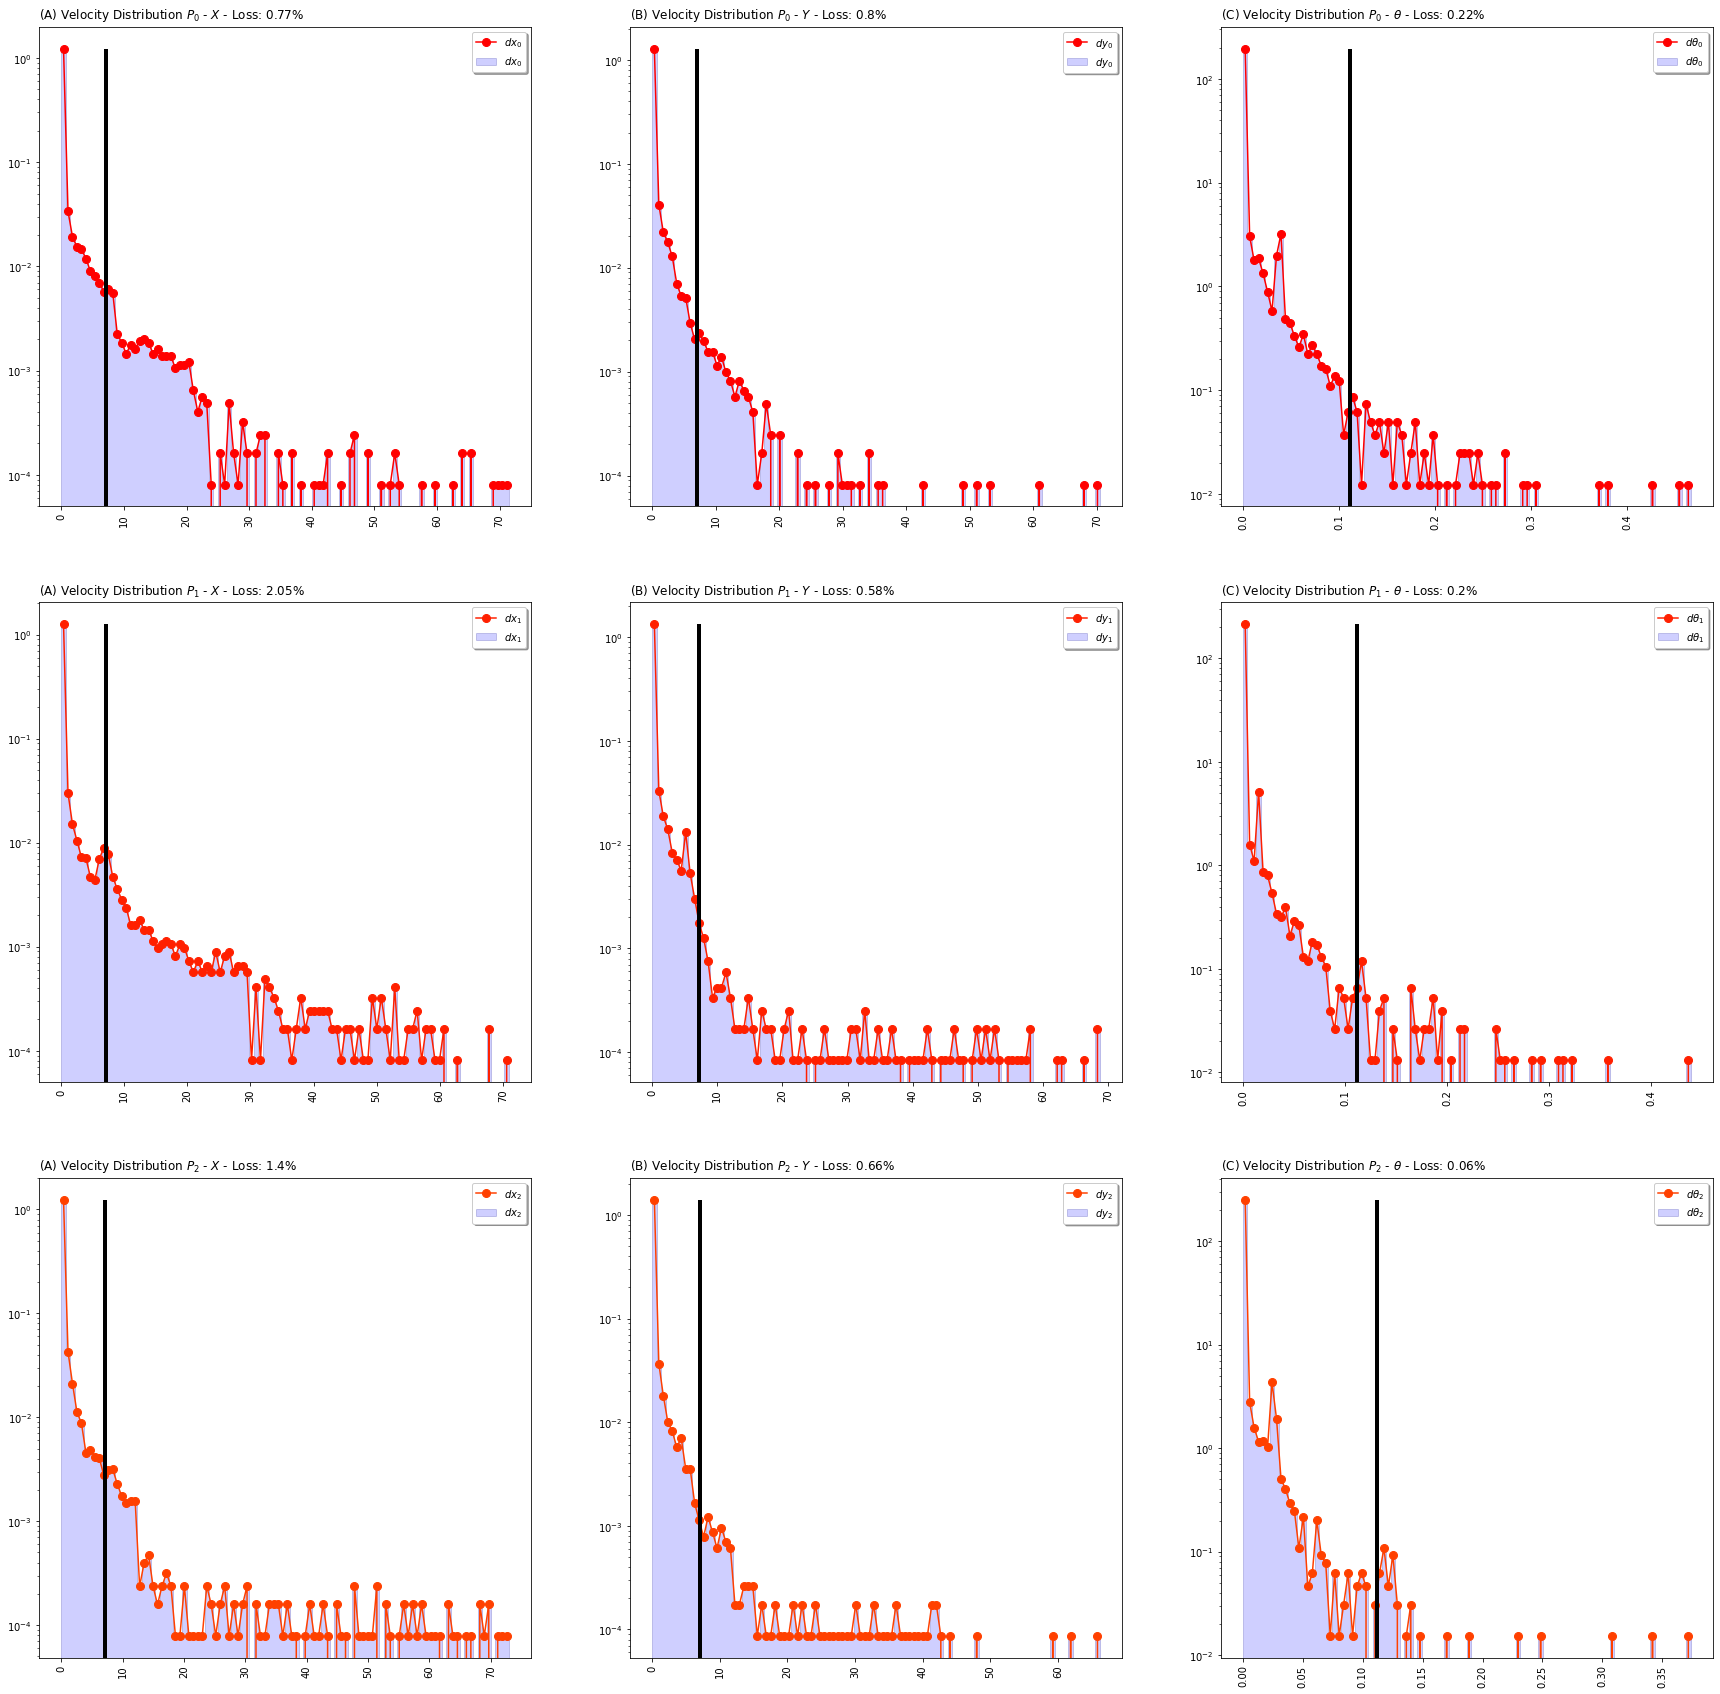

In [18]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = df_full["velocity_orientation"].abs().quantile(0.9965) # Angular velocity per frame
    velocity_threshold = df_full["velocity_x"].abs().quantile(0.9701) # Velocity per frame limited with half average size of particle
    print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend
    )

Original


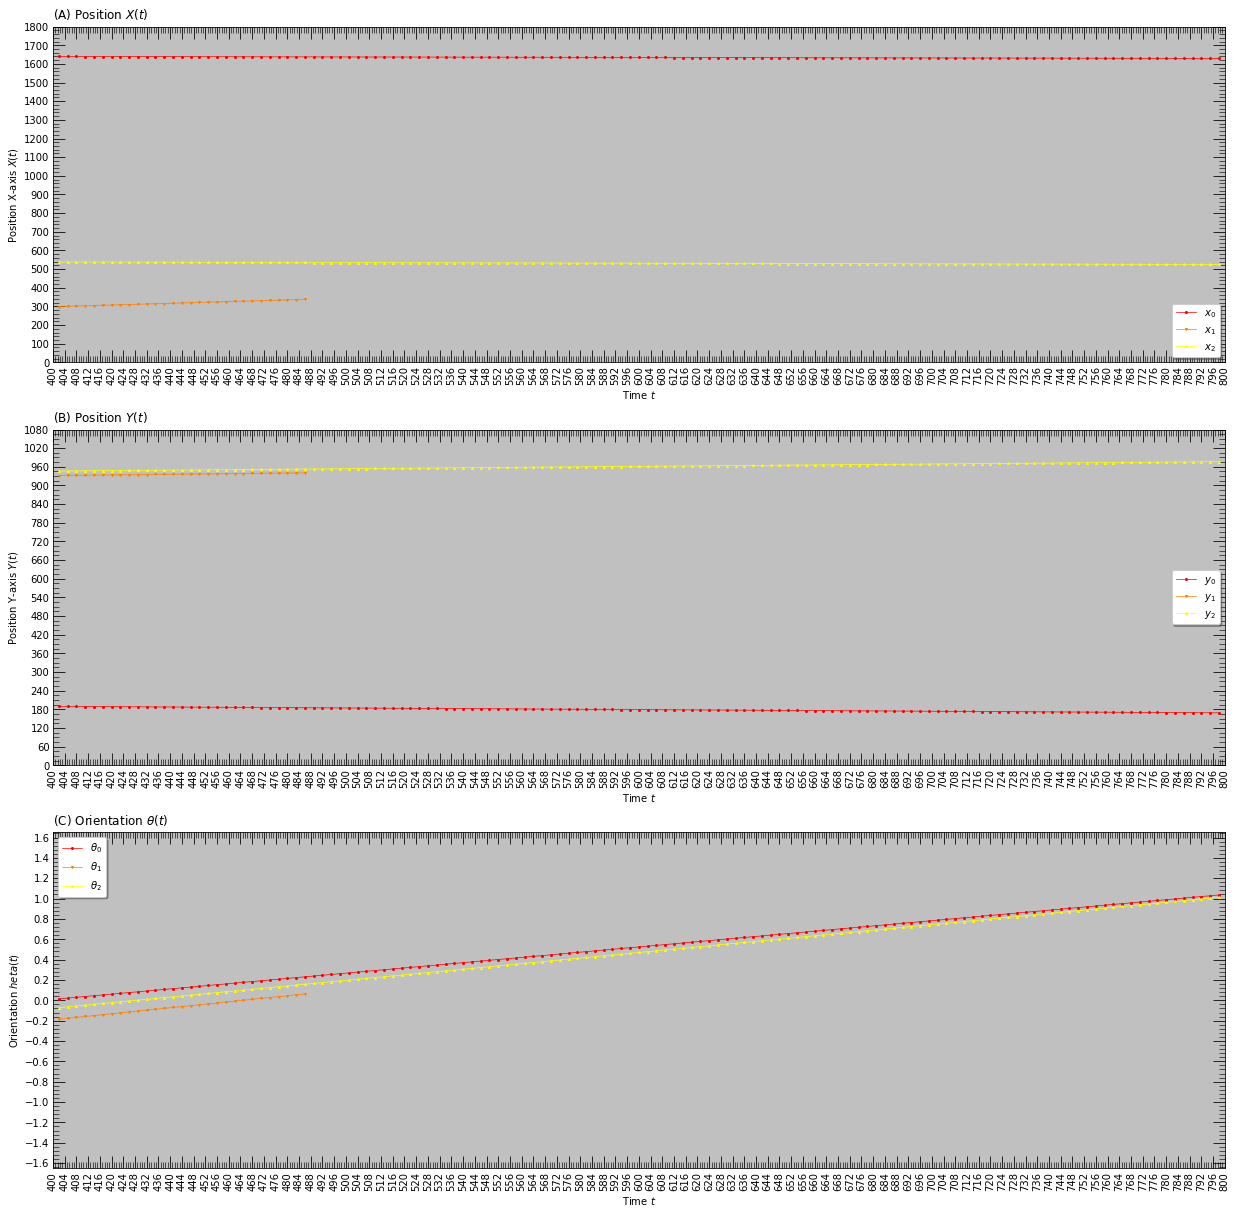

Corrected Orientation


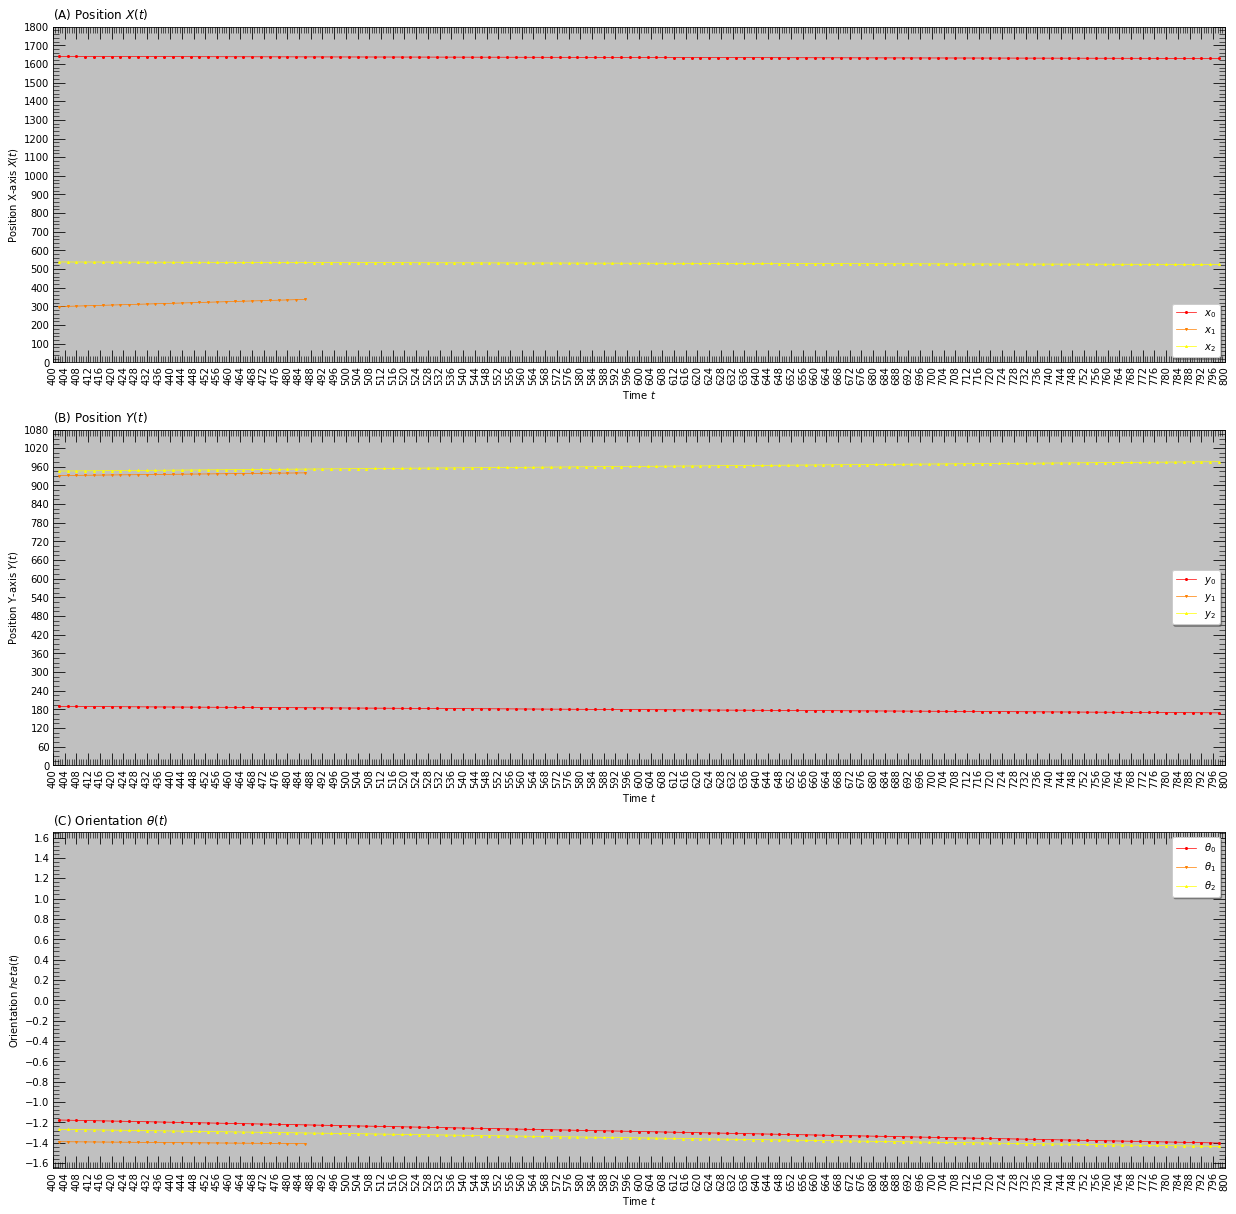

In [24]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf   = 400, 800  # 22200, 24300
    t0_, tf_ = 400, 800  # 22200, 24300
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1800], [0, 1080], [-1.65, 1.65]]
    fancy_legend = True

    print("Original")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = df_full["velocity_x"].abs().quantile(0.9701) # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[((df_smooth["velocity_x"] <= velocity_threshold) & (df_smooth["velocity_y"] <= velocity_threshold))],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend
    )

    print("Corrected Orientation")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[((df_smooth["velocity_x"] <= velocity_threshold) & (df_smooth["velocity_y"] <= velocity_threshold))],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend
    )

In [25]:
df_smooth = df_full.copy()
df_smooth["id"] = df_smooth["permuted_id"]
df_smooth[((df_smooth["time"] >= 22240) & (df_smooth["time"] <= 22800))].sort_values(["permuted_id", "time"])

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
22242,True,22242,chunk_21000_24000,0,0,581.19735,1018.804465,598.088619,1017.690808,0.0,584.213815,1010.462662,0.611482,594.427088,1014.449318,-1.532954,-1.532954,4442.0,143.890912,87.406132,0.794360,3,3.0,0.0,0.0,0.0,False,False,False
22245,True,22245,chunk_21000_24000,0,0,581.19735,1018.804465,598.088619,1017.690808,0.0,584.213815,1010.462662,0.611497,594.427088,1014.449318,-1.532954,-1.532954,4442.0,143.890912,87.406132,0.794360,3,3.0,0.0,0.0,0.0,False,False,False
22248,True,22248,chunk_21000_24000,0,0,581.19735,1018.804465,598.088619,1017.690808,0.0,584.213815,1010.462662,0.611512,594.427088,1014.449318,-1.532954,-1.532954,4442.0,143.890912,87.406132,0.794360,3,3.0,0.0,0.0,0.0,False,False,False
22251,True,22251,chunk_21000_24000,0,0,581.19735,1018.804465,598.088619,1017.690808,0.0,584.213815,1010.462662,0.611527,594.427088,1014.449318,-1.532954,-1.532954,4442.0,143.890912,87.406132,0.794360,3,3.0,0.0,0.0,0.0,False,False,False
22254,True,22254,chunk_21000_24000,0,0,581.19735,1018.804465,598.088619,1017.690808,0.0,584.213815,1010.462662,0.611542,594.427088,1014.449318,-1.532954,-1.532954,4442.0,143.890912,87.406132,0.794360,3,3.0,0.0,0.0,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22790,True,22788,chunk_21000_24000,2,2,56.79577,1046.870209,56.558190,1046.379400,0.0,56.795770,1046.870209,0.565301,56.795770,1046.870209,1.193495,1.193495,243.0,226.393623,73.252551,0.946207,3,3.0,0.0,0.0,0.0,False,False,False
22793,True,22791,chunk_21000_24000,2,2,56.79577,1046.870209,56.558190,1046.379400,0.0,56.795770,1046.870209,0.565290,56.795770,1046.870209,1.193495,1.193495,243.0,226.393623,73.252551,0.946207,3,3.0,0.0,0.0,0.0,False,False,False
22796,True,22794,chunk_21000_24000,2,2,56.79577,1046.870209,56.558190,1046.379400,0.0,56.795770,1046.870209,0.565279,56.795770,1046.870209,1.193495,1.193495,243.0,226.393623,73.252551,0.946207,3,3.0,0.0,0.0,0.0,False,False,False
22799,True,22797,chunk_21000_24000,2,2,56.79577,1046.870209,56.558190,1046.379400,0.0,56.795770,1046.870209,0.565267,56.795770,1046.870209,1.193495,1.193495,243.0,226.393623,73.252551,0.946207,3,3.0,0.0,0.0,0.0,False,False,False


## Setting video information

In [68]:
# # Load the video
# reader = imageio.get_reader("{}/{}.mp4".format(input_path, video_name), "ffmpeg")

# # Check the number of frames
# num_frames = reader.count_frames()
# print("Total frames: {}".format(num_frames))

# # Extract a frame to inspect the content
# time = 0
# frame = reader.get_data(time)
# print("Frames resolution: {} x {}".format(frame.shape[0], frame.shape[1]))

Total frames: 27019
Frames resolution: 1080 x 1920


## Comparative of process

In [69]:
# # Original frame
# time = 209  #271  # 209  # 80
# times = [time - 1, time, time + 1]
# reinforce_boundaries = True
# remove_holes = False
# type = "local equalized"
# clip_limit = 0.05
# threshold = 0.19
# sigma = 1.5
# x_bounds = x_bounds  # [40, 1020]
# y_bounds = y_bounds  # [160, 1740]
# region_area_min = 200
# axis_major_min = 94
# eccentricity_max = 0.99


# df_tracked_frame_0 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[0], reader.get_data(times[0])]
# )

# df_tracked_frame_1 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[1], reader.get_data(times[1])]
# )

# df_tracked_frame_2 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[2], reader.get_data(times[2])]
# )

# df_tracked_old = pd.concat([df_tracked_frame_0, df_tracked_frame_1, df_tracked_frame_2], ignore_index=True)

# width = 10
# n_x_breaks = 20
# n_y_breaks = 20
# fancy_legend = True
# x_legend = 1.001
# y_legend = 0.891

# df_smooth = df_full.copy()
# df_smooth["id"] = df_smooth["permuted_id"]
# df_smooth["orientation"] = df_smooth["corrected_orientation"]

# fig = plt_sp.plot_all_process_frame(
#     reader=reader,
#     times=times,
#     df_tracked=df_tracked_old,
#     df_clustered=df_tracked,
#     df_smoothed=df_smooth,
#     width=width,
#     n_x_breaks=n_x_breaks,
#     n_y_breaks=n_y_breaks,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     fancy_legend=fancy_legend,
#     x_legend=x_legend,
#     y_legend=y_legend
# )